# Notebook 3: Classification Using Machine Learning

In this notebook, we will use a classical machine learning method to classify the astronomical data saved in the previous notebook.

---

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the training images and labels back from the saved NumPy files
train_images = np.load('data/train_images.npy')  # Load image training data
train_labels = np.load('data/train_labels.npy')  # Load label training data
val_images = np.load('data/val_images.npy')  # Load image training data
val_labels = np.load('data/val_labels.npy')  # Load label training data

print("Training Data loaded successfully from NumPy files.")

Training Data loaded successfully from NumPy files.


---

## Pre-processing

We will pre-process the training images to simplify the data by:

1. `Grayscaling`
2. `Normalizing` to range [0, 1]
3. `Downscaling` to a target size of [64x64].
4. `Flattening` the images to be ready for machine learning models.

In [2]:
def preprocessing_fn_ML(X): 
    from skimage.color import rgb2gray
    from skimage.transform import resize
    
    # Normalize the data to [0, 1]
    X_pre = X.astype('float32') / 255.0
    
    # Convert to grayscale
    X_pre = np.array([rgb2gray(image) for image in X_pre])
    
    # Resize images to 64x64 pixels
    X_pre = np.array([resize(image, (64, 64), anti_aliasing=True) for image in X_pre])
    
    # Flatten the images
    num_samples = X_pre.shape[0]
    X_pre = X_pre.reshape(num_samples, -1)
    
    return X_pre

In [3]:
train_images_pre = preprocessing_fn_ML(train_images)
val_images_pre = preprocessing_fn_ML(val_images)


#### **⚠️ Freeing up Space**

In [4]:

import gc

# Since we will no longer need the original data, we can remove it from memory
del train_images, val_images


# Force garbage collection to free up memory
gc.collect()

print("Original images removed from memory.")

Original images removed from memory.


---

### Visualising the data after pre-processing

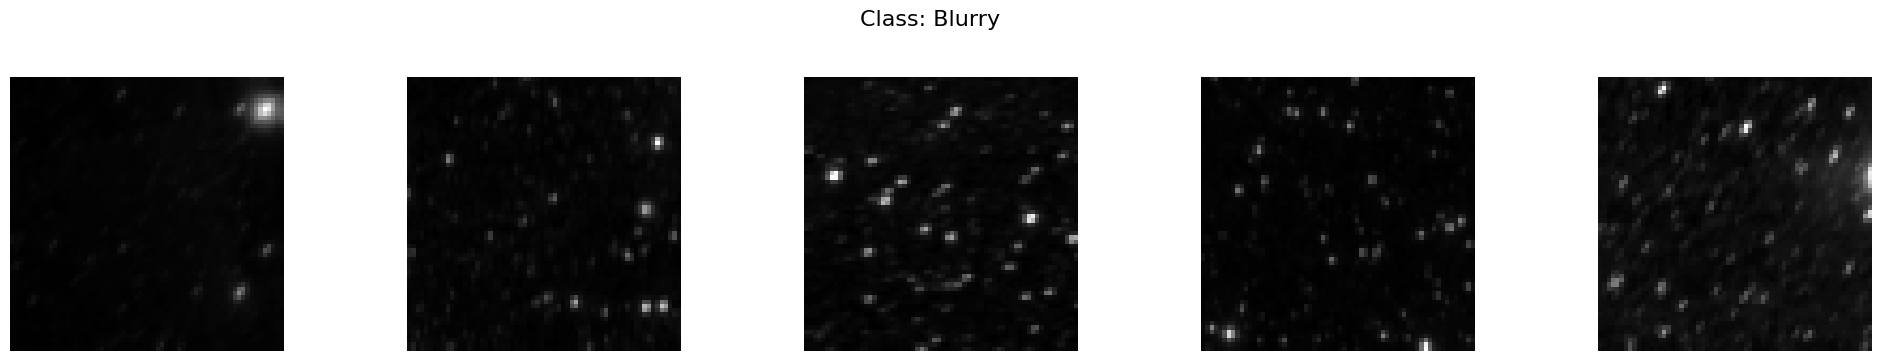

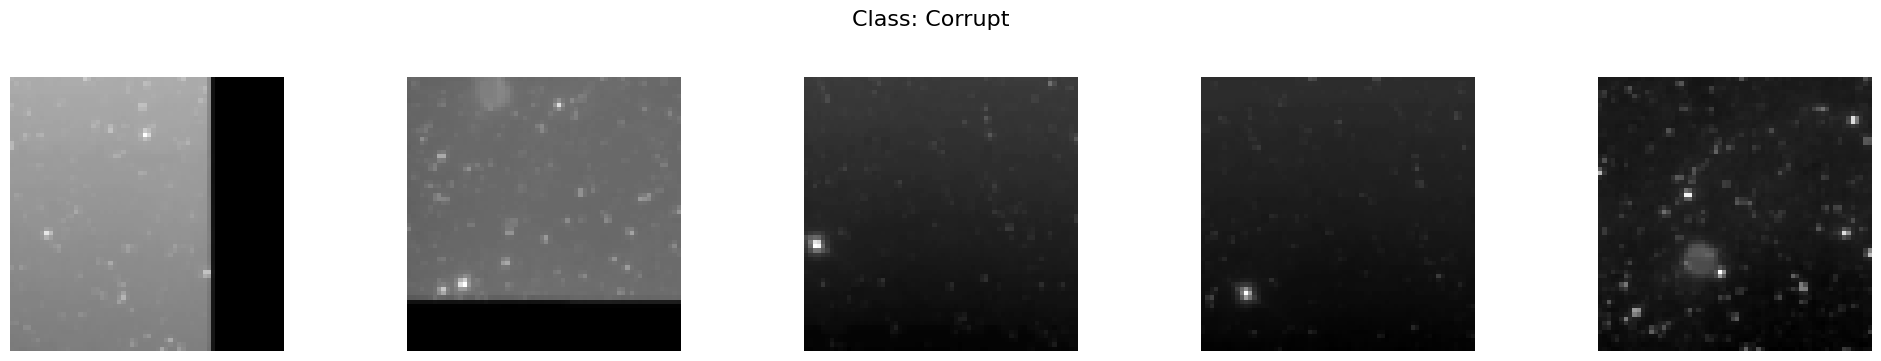

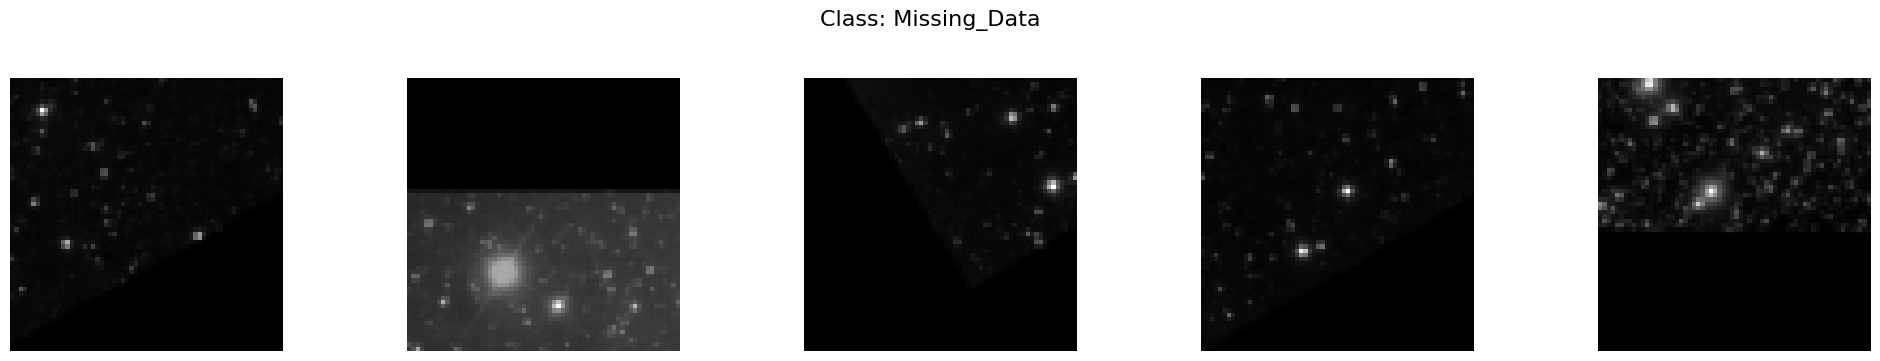

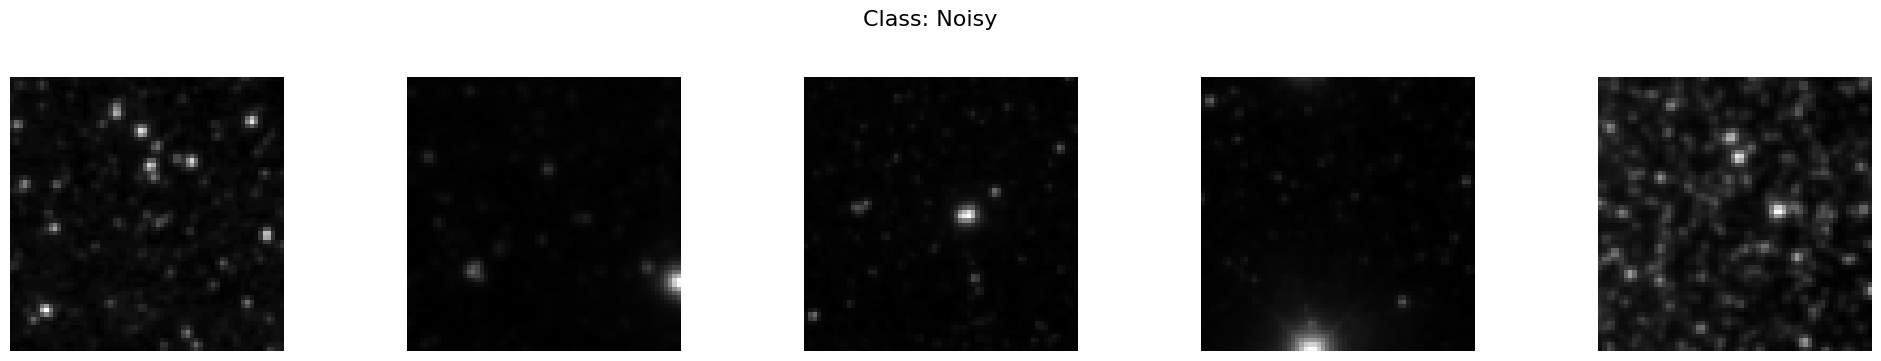

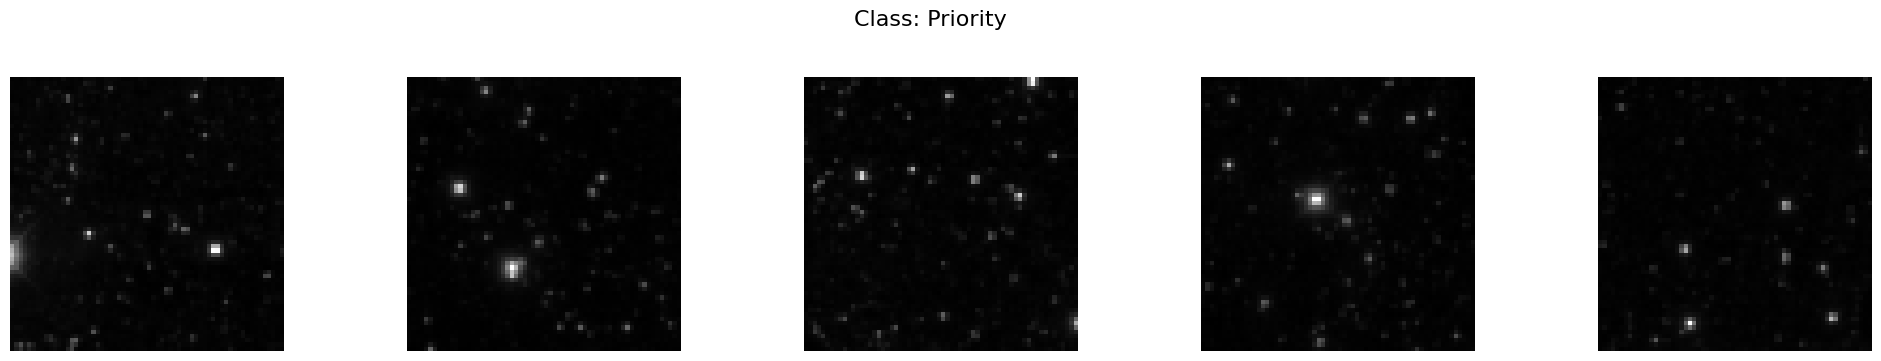

In [5]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Get the unique labels in the training set
unique_labels = np.unique(train_labels)

# Display the first 5 images for each class after preprocessing
for label in unique_labels:
    # Find the indices of images belonging to the current class
    class_indices = np.where(train_labels == label)[0]
    
    # Select the first 5 images of this class
    num_images_to_display = min(5, len(class_indices))
    selected_indices = class_indices[:num_images_to_display]
    selected_images = train_images_pre[selected_indices]  # Already preprocessed images

    # Plot the selected images
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
    fig.suptitle(f'Class: {class_names[label]}', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i].reshape(64, 64), cmap='gray')  # Reshape and use grayscale colormap
        ax.axis('off')
    
    plt.show()
    print()

After reviewing the pre-processed images, it appears that reducing the size from 512x512 to 64x64 may not have been the best choice. Visually, it has become more challenging to distinguish between the **Priority**, **Noisy**, and **Blurry** categories. Now, let’s apply a machine learning method to classify these images.

---

## ML Classification

### Train the Stochastic Gradient Descent (SGD) Model

The Stochastic Gradient Descent (SGD) model uses the SGD optimization method to train machine learning models. The SGDClassifier is effective for efficiently training linear models, particularly on large datasets. However, it may not perform well on complex, non-linear data such as images.

In [6]:
from sklearn.linear_model import SGDClassifier
import pickle

# Create the stochastic gradient descent model

sgd_model = SGDClassifier( loss='log_loss', max_iter=10000, n_jobs=4, random_state=42)

# Fit the model on the training data
sgd_model.fit(train_images_pre, train_labels)

# Save the model to a file
with open('sgd_model.pkl', 'wb') as file:
    pickle.dump(sgd_model, file)

---

### ML: Validation set results

`Validation sets` are commonly used to evaluate the accuracy of machine learning models and guide improvements in their performance. Participants can modify the model `parameters` or adjust the `pre-processing` steps, then retrain the model. The results on the `validation set` help determine if these changes have improved the model’s performance. This iterative testing process should be performed exclusively on the `validation set`, not the `testing set`, to prevent overfitting and ensure the model generalizes well to unseen data.

In [7]:
with open('sgd_model.pkl', 'rb') as file:
    sgd_loaded_model = pickle.load(file)
    
val_predictions = sgd_loaded_model.predict(val_images_pre)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix


# Detailed classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.09      0.14       727
           1       0.98      0.97      0.98       222
           2       0.44      0.20      0.27       421
           3       0.26      0.10      0.15       721
           4       0.41      0.82      0.55      1146

    accuracy                           0.43      3237
   macro avg       0.47      0.44      0.42      3237
weighted avg       0.39      0.43      0.36      3237



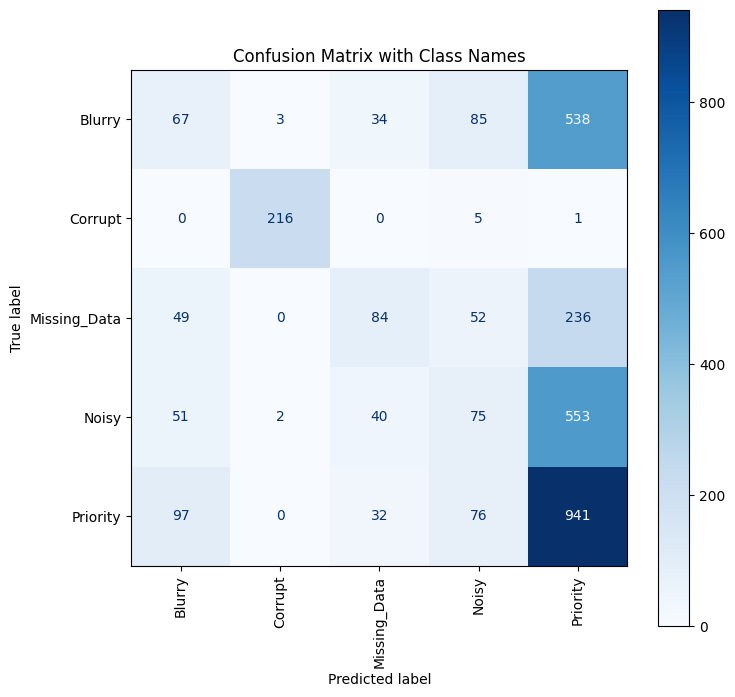

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize and display the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')  # Use a blue colormap
plt.title("Confusion Matrix with Class Names")
plt.show()

The machine learning model is performing poorly. The confusion matrix reveals significant misclassification, particularly between the `Priority` class and the `Noisy` and `Blurry` classes. This observation aligns with our analysis when we visualized the pre-processed images.

---

#### **⚠️ Freeing up Space**

In [11]:
import gc

# Remove the data from memory
del train_images_pre, train_labels, val_images_pre, val_labels

# Force garbage collection to free up memory
gc.collect()

# Clear the input/output cache
print("Data removed from memory.")

Data removed from memory.


In [ ]:
import os
import sys

# Restart the kernel programmatically to free up space
os.execv(sys.executable, ['python'] + sys.argv)